In [1]:

import os
# If this notebook lives in /notebooks/, move to project root:
os.chdir("..")

# Core ML imports
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Data loading helper
from data_utils import get_datasets

# Evaluation & plotting
import numpy as np
import matplotlib.pyplot as plt



# Load datasets once for the entire notebook
train_ds, val_ds = get_datasets()
print("✔️ Datasets ready — Train batches:", 
      tf.data.experimental.cardinality(train_ds).numpy(),
      "Val batches:", tf.data.experimental.cardinality(val_ds).numpy())



Found 791 files belonging to 2 classes.
Using 633 files for training.
Found 791 files belonging to 2 classes.
Using 158 files for validation.
✔️ Datasets ready — Train batches: 20 Val batches: 5


In [2]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_cnn_model()
model.summary()



/Users/sheilamcgovern/Desktop/Projects2025/incremental_capstone_unit4/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)




In [4]:
EPOCHS = 20

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs          = EPOCHS,
    callbacks       = [early_stop, checkpoint],
    verbose         = 2
)



Epoch 1/20


20/20 - 4s - 187ms/step - accuracy: 0.7441 - loss: 2.3568 - val_accuracy: 0.4810 - val_loss: 1.6182
Epoch 2/20
20/20 - 3s - 136ms/step - accuracy: 0.8373 - loss: 0.8581 - val_accuracy: 0.4747 - val_loss: 6.1406
Epoch 3/20
20/20 - 3s - 141ms/step - accuracy: 0.8894 - loss: 0.4045 - val_accuracy: 0.4747 - val_loss: 2.8904
Epoch 4/20
20/20 - 3s - 136ms/step - accuracy: 0.9068 - loss: 0.2732 - val_accuracy: 0.4747 - val_loss: 3.9396
Epoch 5/20
20/20 - 3s - 135ms/step - accuracy: 0.9415 - loss: 0.1674 - val_accuracy: 0.4747 - val_loss: 7.0863
Epoch 6/20
20/20 - 3s - 135ms/step - accuracy: 0.9510 - loss: 0.1002 - val_accuracy: 0.4747 - val_loss: 7.3997


In [5]:
# Load the best weights
model.load_weights('best_model.h5')


# Evaluate loss & accuracy
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
print(f"Final validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}")

# Detailed metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Collect all labels & predictions
y_true, y_pred = [], []
for imgs, labels in val_ds:
    probs = model.predict(imgs).flatten()
    preds = (probs >= 0.5).astype(int)
    y_true.extend(labels.numpy().astype(int))
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Bike','Car']))



Final validation accuracy: 0.4810, loss: 1.6182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Confusion Matrix:
[[ 2 81]
 [ 1 74]]

Classification Report:
              precision    recall  f1-score   support

        Bike       0.67      0.02      0.05        83
         Car       0.48      0.99      0.64        75

    accuracy                           0.48       158
   macro avg       0.57      0.51      0.34       158
weighted avg       0.58      0.48      0.33       158



2025-06-07 11:13:11.470383: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


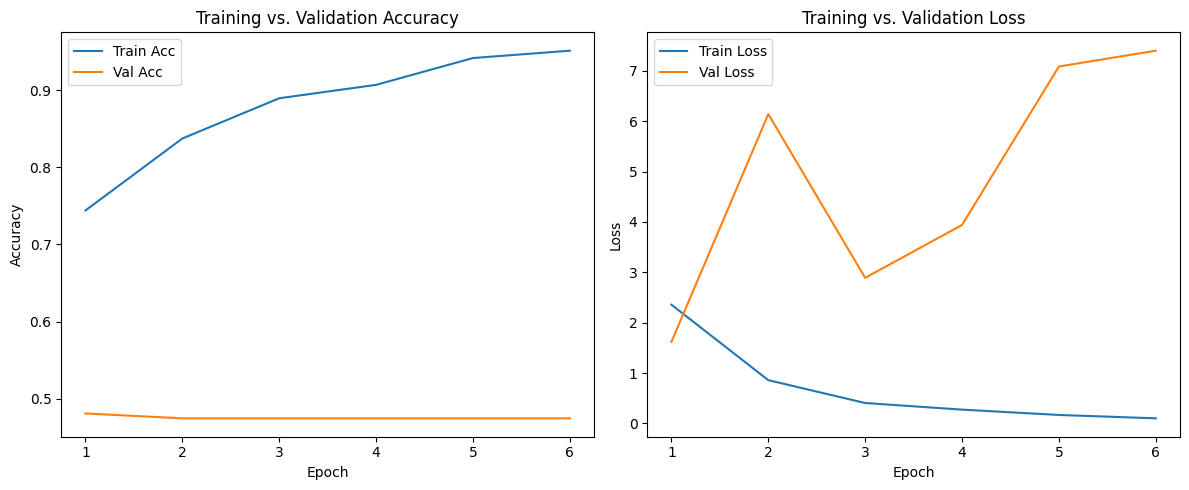

In [6]:
import matplotlib.pyplot as plt

# Pull metrics from history
acc       = history.history['accuracy']
val_acc   = history.history['val_accuracy']
loss_vals = history.history['loss']
val_loss  = history.history['val_loss']
epochs    = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_vals, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

